In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
# from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Cargar los datos de la Varcua 
data = pd.read_excel('emicron_21_final_ambulantes.xlsx')
data.shape

(2702, 158)

In [44]:
data['p3091'].head(2)

0    2
1    1
Name: p3091, dtype: int64

In [45]:
data.set_index('id', inplace = True)

In [46]:
# Seleccionar el subconjunto específico de columnas
# Agregar variables dummy no conduce a la sobreespecificación del modelo, por lo tanto, se busca que la red neuronal capture
# las relaciones especificas entre cada categoría y la variable de respuesta, por lo tanto, la presencia de una de estas 
# variabes dummy puede influir en como la red neuronal aprende y generaliza patrones asociados en cada categoría. 
variables_principales = ['ventas_mes_anterior', 'p35', 'p639', 'p3091', 'p1633', 'p1055', 'p3088', 'clase_te']

# Creamos un nuevo DataFrame con solo las columnas o varibales seleccionadas
variables_principales = data[variables_principales]

variables_principales.head(5)

,ventas_mes_anterior,p35,p639,p3091,p1633,p1055,p3088,clase_te
id,,,,,,,,
529996411,400000,2,1,2,2,2,2,1
530006311,870000,1,5,1,2,2,2,1
530011312,650000,2,4,1,2,2,2,1
530019511,700000,2,2,3,2,2,2,1
530044811,700000,2,1,1,2,2,2,1


In [47]:
type(variables_principales)

pandas.core.frame.DataFrame

Matriz de correlación:
                     ventas_mes_anterior       p35      p639     p3091  \
ventas_mes_anterior             1.000000 -0.124792  0.095774  0.260533   
p35                            -0.124792  1.000000 -0.161377  0.013132   
p639                            0.095774 -0.161377  1.000000  0.024634   
p3091                           0.260533  0.013132  0.024634  1.000000   
p1633                          -0.108058  0.057014 -0.083080 -0.128104   
p1055                          -0.150498  0.020986 -0.078690 -0.211676   
p3088                           0.072815  0.011738  0.026963 -0.023448   
clase_te                        0.005414  0.064334 -0.048917  0.036476   

                        p1633     p1055     p3088  clase_te  
ventas_mes_anterior -0.108058 -0.150498  0.072815  0.005414  
p35                  0.057014  0.020986  0.011738  0.064334  
p639                -0.083080 -0.078690  0.026963 -0.048917  
p3091               -0.128104 -0.211676 -0.023448  0.036476  


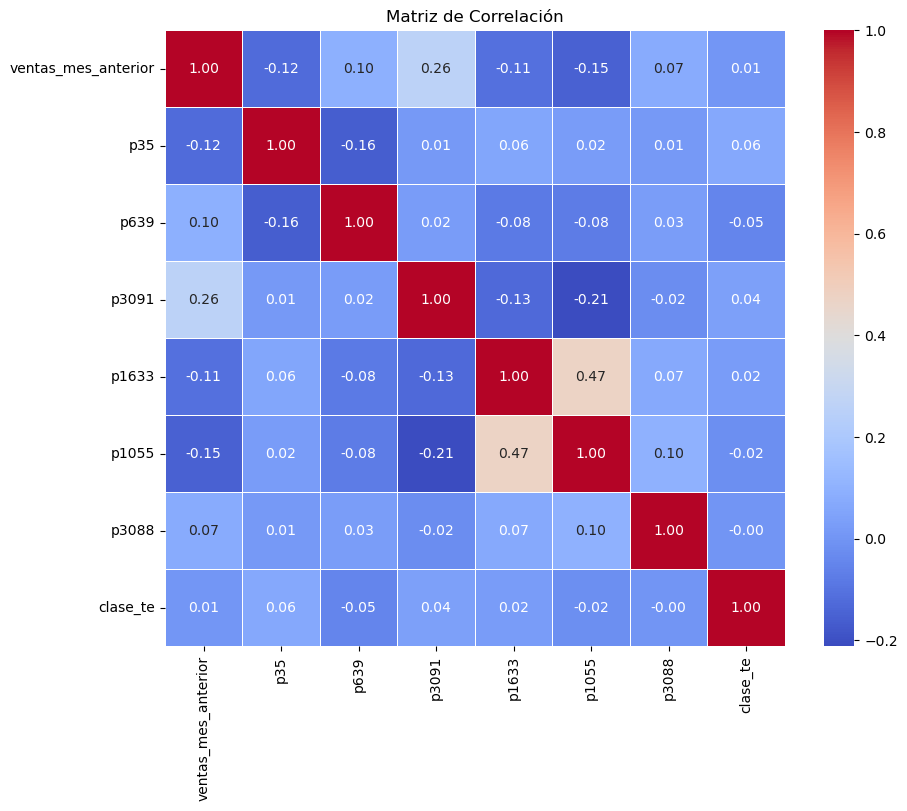

In [48]:
# Calcular la matriz de correlación, Se utiliza el método corr() del DataFrame para calcular la matriz de correlación entre
#todas las variables seleccionadas en variables_principales. La matriz de correlación muestra cómo están relacionadas 
#linealmente las diferentes variables entre sí.

correlation_matrix = variables_principales.corr()

# Mostrar o imprimir la matriz de correlación en la consola
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación utilizando un mapa de calor (heatmap) de seaborn
plt.figure(figsize=(10, 8)) #tamaño de la matriz
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5) # annot=True; muestra los valores de 
#correlación en cada celda, cmap='coolwarm' es la paleta de colores; fmt = '2f' formato de valores mostrado en cada celda, 
# para este caso, dos decimales, linewidth=5; ancho de las líneas.
plt.title('Matriz de Correlación')
plt.show()


Epoch 1/50


C:\Users\cegut\.conda\envs\anomalias\Lib\site-packages\keras\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 - 1s - 17ms/step - loss: 0.9512 - mae: 0.3757 - val_loss: 0.3734 - val_mae: 0.3591
Epoch 2/50
68/68 - 0s - 2ms/step - loss: 0.9052 - mae: 0.3684 - val_loss: 0.3748 - val_mae: 0.3529
Epoch 3/50
68/68 - 0s - 2ms/step - loss: 0.8955 - mae: 0.3614 - val_loss: 0.3791 - val_mae: 0.3477
Epoch 4/50
68/68 - 0s - 2ms/step - loss: 0.8754 - mae: 0.3643 - val_loss: 0.3810 - val_mae: 0.3626
Epoch 5/50
68/68 - 0s - 2ms/step - loss: 0.8634 - mae: 0.3523 - val_loss: 0.3837 - val_mae: 0.3652
Epoch 6/50
68/68 - 0s - 2ms/step - loss: 0.8490 - mae: 0.3662 - val_loss: 0.3966 - val_mae: 0.3486
Epoch 7/50
68/68 - 0s - 2ms/step - loss: 0.8373 - mae: 0.3587 - val_loss: 0.4056 - val_mae: 0.3498
Epoch 8/50
68/68 - 0s - 2ms/step - loss: 0.8233 - mae: 0.3489 - val_loss: 0.4032 - val_mae: 0.3642
Epoch 9/50
68/68 - 0s - 2ms/step - loss: 0.8114 - mae: 0.3602 - val_loss: 0.4276 - val_mae: 0.3596
Epoch 10/50
68/68 - 0s - 2ms/step - loss: 0.7999 - mae: 0.3519 - val_loss: 0.4460 - val_mae: 0.3676
Epoch 11/50
68/68 -

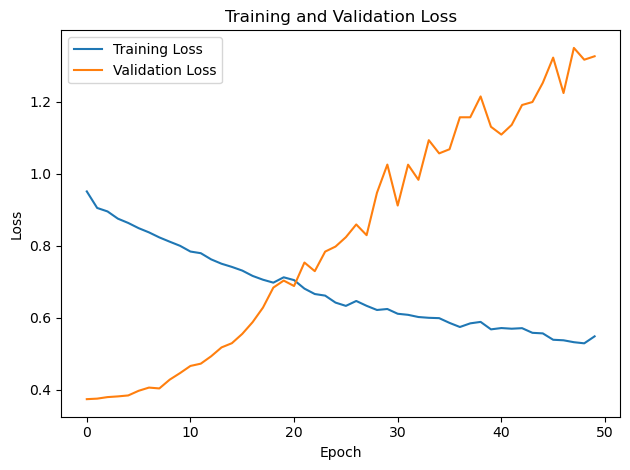

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Índices de datos anómalos: [  4  40  80 109 154 503]


In [49]:
# Seleccionamos las variables predictoras (X) y la variable de salida (y)
X = variables_principales.drop(['ventas_mes_anterior'], axis=1)
y = variables_principales['ventas_mes_anterior']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Construimos el modelo de regresión
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Capa de salida lineal para regresión

# Compilamos el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled), verbose=2)

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f'Mean Absolute Error (MAE) en el conjunto de prueba: {mae}')

# Visualizamos la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Predicciones en el conjunto de prueba
predictions_scaled = model.predict(X_test_scaled)

# Desnormalizar las predicciones
predictions = scaler_y.inverse_transform(predictions_scaled)

residuals = y_test.values - predictions.flatten() # --> Calcular los residuos (diferencia entre las predicciones y los valores reales)

# Calcular la desviación estándar de los residuos
std_dev_residuals = np.std(residuals)

anomaly_threshold = 3 * std_dev_residuals # --> Definir un umbral para detectar aLnomalías (por ejemplo, 3 veces la desviación estándar)

anomalies = np.where(np.abs(residuals) > anomaly_threshold)[0] # -- > Identificamos los índices de los datos anómalos

print("Índices de datos anómalos:", anomalies) # --> Mostramos los índices de los datos anómalos


In [50]:
# regla de tukey 

# Obtener las predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Calcular los residuos
residuals = y_test_scaled - predictions.reshape(-1)

# Calcular el rango intercuartílico (IQR)
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = (residuals < lower_limit) | (residuals > upper_limit)

# Mostrar estadísticas sobre valores atípicos
print(f'Número de valores atípicos: {np.sum(outliers)}')
print(f'Porcentaje de valores atípicos: {np.mean(outliers) * 100}%')


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Número de valores atípicos: 28914
Porcentaje de valores atípicos: 9.879015036848992%


In [51]:
# Obtener las filas con valores atípicos
outliers_rows = X_test[outliers]

# Mostrar las filas con valores atípicos
print("Filas con valores atípicos:")
outliers_rows

Filas con valores atípicos:


,p35,p639,p3091,p1633,p1055,p3088,clase_te
id,,,,,,,
542832611,1,5,1,2,2,2,1
542832611,1,5,1,2,2,2,1
542832611,1,5,1,2,2,2,1
542832611,1,5,1,2,2,2,1
542832611,1,5,1,2,2,2,1
...,...,...,...,...,...,...,...
552919711,1,5,1,2,2,2,1
552919711,1,5,1,2,2,2,1
552919711,1,5,1,2,2,2,1


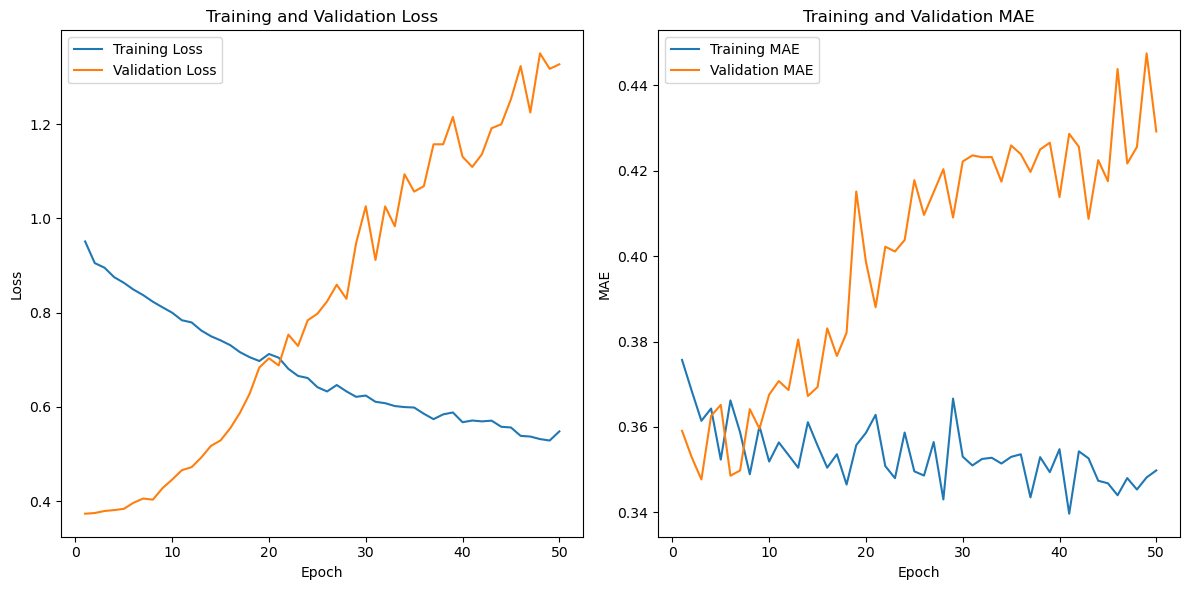

In [53]:
import matplotlib.pyplot as plt

# Visualizamos la pérdida y el MAE durante el entrenamiento
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 6)) # --> Pérdida en el conjunto de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2) # --> MAE en el conjunto de entrenamiento y validación
plt.plot(epochs, history.history['mae'], label='Training MAE')
plt.plot(epochs, history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


- la pérdida en el conjunto de prueba ('va_loss') tiene un comportamiento hacia la baja o que disminuye en la gran mayoria de epocas o EPOCHS, lo cual es positivo.
- El MAE es el conjunto de prueba ('val_mae') también disminuye, lo cual nos indica que las predicciones del modelo estan mejorando en terminos de la precisión.

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


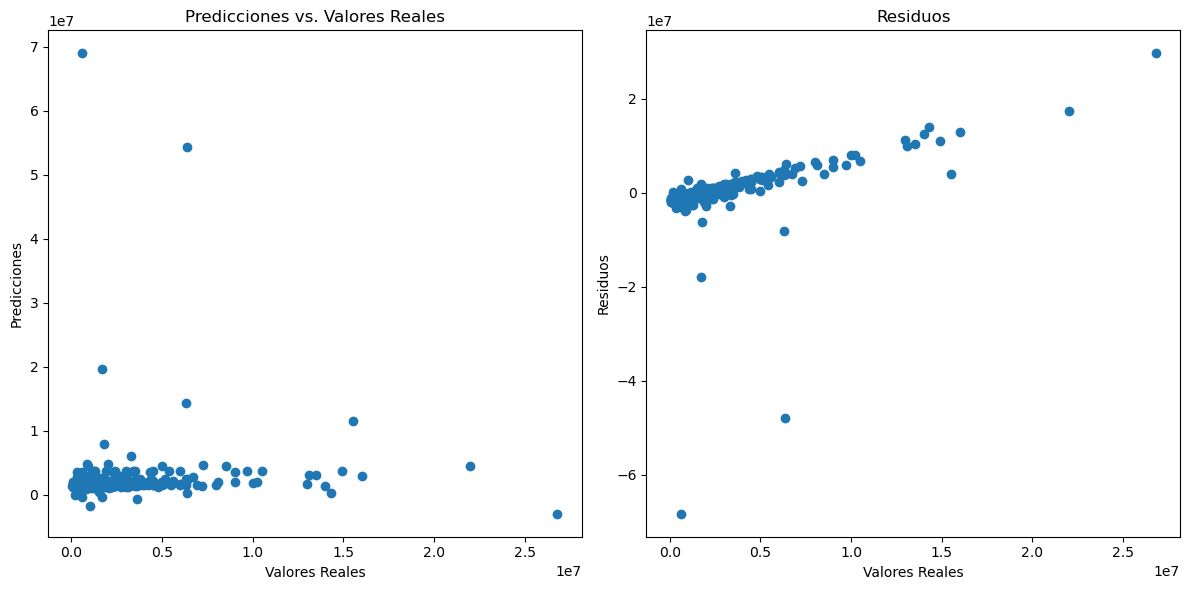

In [54]:
# Obtener predicciones en el conjunto de prueba
y_pred_scaled = model.predict(X_test_scaled)

# Deshacemos la normalización en las predicciones y en los datos reales
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled)

# Calculamos los  residuos
residuos = y_test_unscaled.flatten() - y_pred.flatten()

# Visualizamos las predicciones vs. valores reales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_unscaled, y_pred)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Visualizamos los residuos
plt.subplot(1, 2, 2)
plt.scatter(y_test_unscaled, residuos)
plt.title('Residuos')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()

In [57]:
# Establecer un umbral para identificar anomalías (por ejemplo, 3 desviaciones estándar)
umbral_anomalia = 3

anomalias_indices = np.where(np.abs(residuos) > umbral_anomalia)[0] # --> Identificar filas con residuos significativos

anomalias = data.loc[y_test.index[anomalias_indices]] # --> Mostrar las filas con anomalías

print("Filas con anomalías:")
anomalias.shape

Filas con anomalías:


(541, 157)

In [58]:
# Calcular el rango intercuartílico (IQR) de los residuos
Q1 = np.percentile(residuos, 25)
Q3 = np.percentile(residuos, 75)
IQR = Q3 - Q1

# Establecer el factor multiplicativo (puedes ajustar este valor según sea necesario)
factor_tukey = 1.5

# Calcular los límites para identificar anomalías
limite_inferior = Q1 - factor_tukey * IQR
limite_superior = Q3 + factor_tukey * IQR

anomalias_indices_tukey = np.where((residuos < limite_inferior) | (residuos > limite_superior))[0] # --> Identificar filas con residuos fuera de los límites

anomalias_tukey = data.loc[y_test.index[anomalias_indices_tukey]] # --> Mostrar las filas con anomalías según la regla de Tukey

print("Filas con anomalías según la regla de Tukey:")
anomalias_tukey.shape

Filas con anomalías según la regla de Tukey:


(52, 157)

In [59]:
anomalias_tukey.head()

,directorio,secuencia_p,secuencia_encuesta,cod_depto,area,clase_te,p35,p241,mes_ref,p3031,...,p4030,p4031,p4032,p4038,p3072,ventas_mes_anterior,ventas_mes_anio_anterior,ventas_anio_anterior,valor_agregado,ingreso_mixto
id,,,,,,,,,,,,,,,,,,,,,
557473911,5574739,1,1,70,70.0,1,1,40,NOVIEMBRE,1,...,NaN,NaN,NaN,NaN,1800000,22000000,23000000.0,276000000.0,6600000,5800000
553861111,5538611,1,1,8,8.0,1,1,61,SEPTIEMBRE,1,...,NaN,NaN,NaN,NaN,900000,5135000,4000000.0,48000000.0,1820000,900000
553879612,5538796,1,2,8,8.0,1,1,47,SEPTIEMBRE,2,...,NaN,NaN,NaN,NaN,1200000,8100000,0.0,24300000.0,1800000,1800000
554315011,5543150,1,1,20,20.0,1,2,35,SEPTIEMBRE,1,...,0.0,NaN,NaN,NaN,900000,16000000,2700000.0,52000000.0,5324000,3264000
601283611,6012836,1,1,47,47.0,1,2,32,DICIEMBRE,2,...,NaN,NaN,NaN,NaN,900000,4200000,2800000.0,9800000.0,1015000,1015000


In [60]:
# Exportando la tabla de anómalos a partir de los resultados obtenidos con el criterio de Tukey
anomalias_tukey.to_excel('RN_tabla_anomalos.xlsx', index = True)